#  Caso de estudio Bellabeat! 

Bellabeat es una empresa de alta tecnología que fabrica dispositivos inteligentes centrados en la salud, que recopilan datos sobre actividad, sueño, estrés y salud reproductiva de la mujer, permitiendo a Bellabeat empoderar a las mujeres con conocimientos sobre su propia salud y hábitos. 

Se tiene como objetivo encontrar las tendencias en el uso de dispositivos inteligentes y utilizar esta información para ayudar a influir en su estrategia de marketing.

### Fuente de datos
Los datos utilizados en este caso de estudio son públicos en la plataforma Kaggle.

In [2]:
#importar librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
#cargar datos
activity = pd.read_csv('Fitabase Data/dailyActivity_merged.csv')
calories = pd.read_csv('Fitabase Data/hourlyCalories_merged.csv')
intensities = pd.read_csv('Fitabase Data/hourlyIntensities_merged.csv')
sleep = pd.read_csv('Fitabase Data/sleepDay_merged.csv')
weight  = pd.read_csv('Fitabase Data/weightLogInfo_merged.csv')

In [4]:
activity.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [5]:
activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [6]:
calories.dtypes

Id               int64
ActivityHour    object
Calories         int64
dtype: object

In [7]:
calories.head()

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


In [8]:
intensities.dtypes

Id                    int64
ActivityHour         object
TotalIntensity        int64
AverageIntensity    float64
dtype: object

In [9]:
intensities.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,20,0.333333
1,1503960366,4/12/2016 1:00:00 AM,8,0.133333
2,1503960366,4/12/2016 2:00:00 AM,7,0.116667
3,1503960366,4/12/2016 3:00:00 AM,0,0.000000
4,1503960366,4/12/2016 4:00:00 AM,0,0.000000


In [10]:
sleep.dtypes

Id                     int64
SleepDay              object
TotalSleepRecords      int64
TotalMinutesAsleep     int64
TotalTimeInBed         int64
dtype: object

In [11]:
sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [12]:
weight.dtypes

Id                  int64
Date               object
WeightKg          float64
WeightPounds      float64
Fat               float64
BMI               float64
IsManualReport       bool
LogId               int64
dtype: object

In [13]:
weight.tail()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
62,8877689391,5/6/2016 6:43:35 AM,85.000000,187.392923,NaN,25.440001,False,1462517015000
63,8877689391,5/8/2016 7:35:53 AM,85.400002,188.274775,NaN,25.559999,False,1462692953000
64,8877689391,5/9/2016 6:39:44 AM,85.500000,188.495234,NaN,25.610001,False,1462775984000
65,8877689391,5/11/2016 6:51:47 AM,85.400002,188.274775,NaN,25.559999,False,1462949507000
66,8877689391,5/12/2016 6:42:53 AM,84.000000,185.188300,NaN,25.139999,False,1463035373000


In [14]:
#examinar si hay duplicados y eliminarlos
print(activity.duplicated().sum())
print(calories.duplicated().sum())
print(sleep.duplicated().sum())
print(intensities.duplicated().sum())
print(weight.duplicated().sum())


0
0
3
0
0


In [15]:
#eliminar filas duplicadas
sleep = sleep.drop_duplicates()

In [16]:
#verificar valores nulos
print(sleep.isnull().sum(), '\n')
print(calories.isnull().sum(), '\n')
print(activity.isnull().sum(), '\n')
print(weight.isnull().sum(), '\n')
print(intensities.isnull().sum(), '\n')

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64 

Id              0
ActivityHour    0
Calories        0
dtype: int64 

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64 

Id                 0
Date               0
WeightKg           0
WeightPounds       0
Fat               65
BMI                0
IsManualReport     0
LogId              0
dtype: int64 

Id                  0
ActivityHour        0
TotalIntensity      0
AverageIntensity    0
dtype: int64 



In [17]:
del(weight['Fat'])
weight.head()

,Id,Date,WeightKg,WeightPounds,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,21.690001,True,1463097599000


In [18]:
#formato de fecha
activity['ActivityDate'] = pd.to_datetime(activity['ActivityDate'], format='%m/%d/%Y')
calories['ActivityHour'] = pd.to_datetime(calories['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')
intensities['ActivityHour'] = pd.to_datetime(intensities['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')
sleep['SleepDay'] = pd.to_datetime(sleep['SleepDay'], format='%m/%d/%Y %I:%M:%S %p')
weight['Date'] = pd.to_datetime(weight['Date'], format='%m/%d/%Y %I:%M:%S %p')


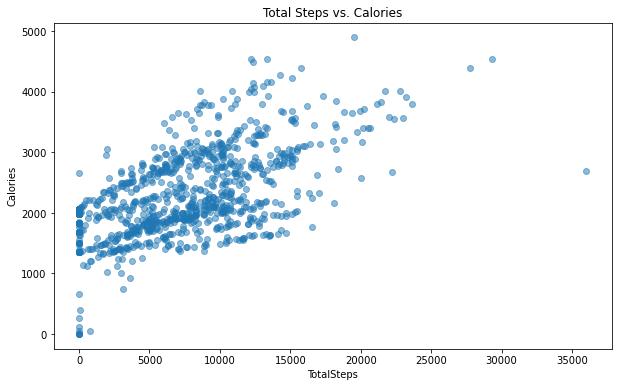

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(activity['TotalSteps'], activity['Calories'], alpha=0.5)#(x,y)
plt.title('Total Steps vs. Calories')
plt.ylabel('Calories')
plt.xlabel('TotalSteps')
plt.show()

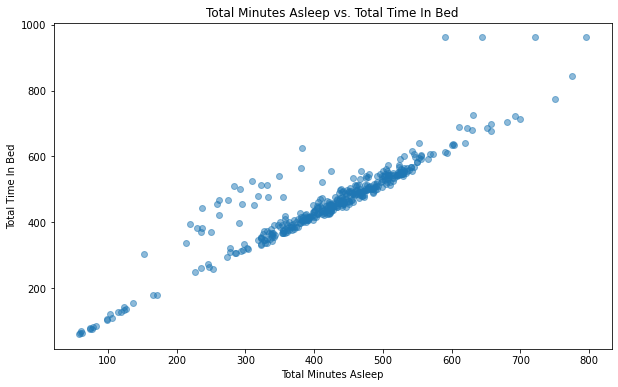

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(sleep['TotalMinutesAsleep'], sleep['TotalTimeInBed'], alpha=0.5)
plt.title('Total Minutes Asleep vs. Total Time In Bed')
plt.ylabel('Total Time In Bed')
plt.xlabel('Total Minutes Asleep')
plt.show()

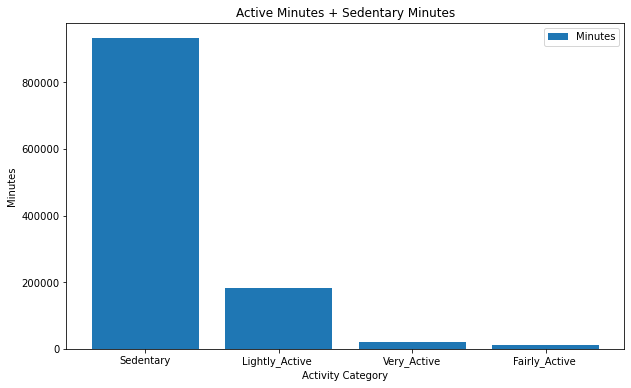

In [21]:
x=['Sedentary', 'Lightly_Active ', 'Very_Active', 'Fairly_Active ']
y=[activity['SedentaryMinutes'].sum(), activity['LightlyActiveMinutes'].sum(),activity['VeryActiveMinutes'].sum(), activity['FairlyActiveMinutes'].sum()]
plt.figure(figsize=(10,6))
plt.bar(x, y, label='Minutes')
plt.title('Active Minutes + Sedentary Minutes')
plt.ylabel('Minutes')
plt.xlabel('Activity Category')
plt.legend()
plt.show()

In [33]:
intensities.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity,dates,time
0,1503960366,2016-04-12 00:00:00,20,0.333333,2016-04-12,00:00:00
1,1503960366,2016-04-12 01:00:00,8,0.133333,2016-04-12,01:00:00
2,1503960366,2016-04-12 02:00:00,7,0.116667,2016-04-12,02:00:00
3,1503960366,2016-04-12 03:00:00,0,0.000000,2016-04-12,03:00:00
4,1503960366,2016-04-12 04:00:00,0,0.000000,2016-04-12,04:00:00


In [46]:


df = intensities.groupby(pd.to_datetime(intensities['ActivityHour']).dt.time)['TotalIntensity'].mean()
df = df.to_frame().reset_index()
df['ActivityHour'] = pd.to_datetime(df['ActivityHour'].astype(str))
df


#conversion de time a formato date time para ser graficado

,ActivityHour,TotalIntensity
0,2022-04-19 00:00:00,2.129550
1,2022-04-19 01:00:00,1.419078
2,2022-04-19 02:00:00,1.043944
3,2022-04-19 03:00:00,0.443730
4,2022-04-19 04:00:00,0.633047
5,2022-04-19 05:00:00,4.950644
6,2022-04-19 06:00:00,7.771214
7,2022-04-19 07:00:00,10.733620
8,2022-04-19 08:00:00,14.668099
9,2022-04-19 09:00:00,15.387755


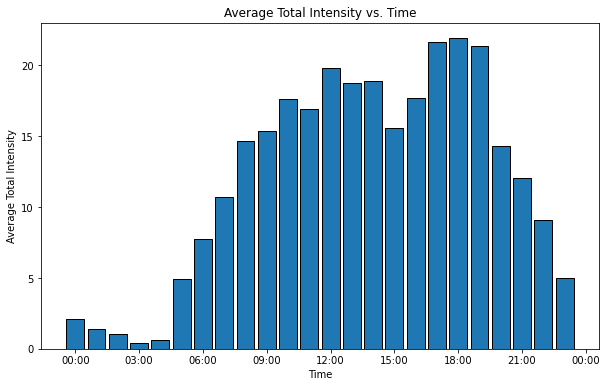

In [44]:
plt.figure(figsize=(10,6))
plt.bar(df['ActivityHour'], df['TotalIntensity'], edgecolor='black', width=0.035)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.title('Average Total Intensity vs. Time')
plt.ylabel('Average Total Intensity')
plt.xlabel('Time')
plt.show()


In [46]:
#describe
print(sleep.describe(), '\n')
print(calories.describe(), '\n')
print(activity.describe(), '\n')
print(weight.describe(), '\n')
print(intensities.describe(), '\n')

                 Id  TotalSleepRecords  TotalMinutesAsleep  TotalTimeInBed
count  4.100000e+02         410.000000          410.000000      410.000000
mean   4.994963e+09           1.119512          419.173171      458.482927
std    2.060863e+09           0.346636          118.635918      127.455140
min    1.503960e+09           1.000000           58.000000       61.000000
25%    3.977334e+09           1.000000          361.000000      403.750000
50%    4.702922e+09           1.000000          432.500000      463.000000
75%    6.962181e+09           1.000000          490.000000      526.000000
max    8.792010e+09           3.000000          796.000000      961.000000 

                 Id      Calories
count  2.209900e+04  22099.000000
mean   4.848235e+09     97.386760
std    2.422500e+09     60.702622
min    1.503960e+09     42.000000
25%    2.320127e+09     63.000000
50%    4.445115e+09     83.000000
75%    6.962181e+09    108.000000
max    8.877689e+09    948.000000 

               